In [34]:
import argparse
import sys

import gym
from gym import wrappers, logger

import numpy as np
import GPy
import maxint_opt as opt
logger.set_level(logger.INFO)

env = gym.make("MountainCarContinuous-v0")

INFO: Making new env: MountainCarContinuous-v0
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
DEBUG: Writing training manifest file to /tmp/random-agent-results/openaigym.manifest.4.9604.manifest.json
INFO: Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/random-agent-results')


In [35]:
outdir = '/tmp/random-agent-results'
env = wrappers.Monitor(env, directory=outdir, force=True)
env.seed(0)


episode_count = 100
reward = 0
done = False

INFO: Clearing 10 monitor files from previous run (because force=True was provided)


(100, 2)


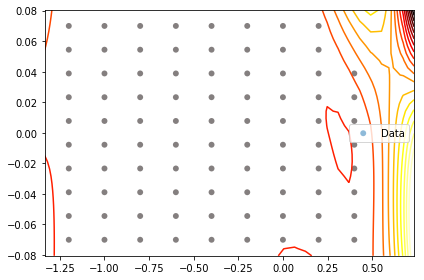

In [48]:
supports = []
for i in np.linspace(-1.2,0.6,10):
    for j in np.linspace(-0.07,0.07,10):
        supports.append(np.array([i,j]))
supports = np.array(supports)
print supports.shape

Y = []
for s in supports:
    actions = np.reshape(np.linspace(-1,1,100),(-1,1))
    def VAL(u):
        return [env.env.env.preview_step(s,u)[1]]
    vals = np.apply_along_axis(VAL, 1, actions)
    Y.append(vals.max())
Y = np.reshape(np.array(Y),(-1,1))
V = GPy.models.GPRegression(supports, Y, GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=0.5),noise_var=0.0)

V.plot()

In [50]:
VS = []
for i in range(30):
    print "ITERATION %d" % i
    Y = []
    for s in supports:
        print s
        actions = np.reshape(np.linspace(-1,1,100),(-1,1))
#         s2d = np.array([s])
#         gp = GPy.models.GPRegression(s2d,  bool(s[0] >= env.env.env.goal_position) * 100.0 + V.predict(s2d)[0], GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=1.0),noise_var=0.0)
#         maxa, value = q_estimate2(V,gp,s2d[0,:])
#         Y.append([vals.max()])
        def VAL(u):
            val = env.env.env.preview_step(s,u)
            return val[1] + 0.9 * V.predict(np.array([val[0]]))[0]
        vals = np.apply_along_axis(VAL, 1, actions)
        Y.append([vals.max()])
    Y = np.reshape(np.array(Y),(-1,1))
    V = GPy.models.GPRegression(supports, Y, GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=0.5),noise_var=0.0)
    VS.append(V)
VFinal = V

ITERATION 0
[-1.2  -0.07]
[-1.2        -0.05444444]
[-1.2        -0.03888889]
[-1.2        -0.02333333]
[-1.2        -0.00777778]
[-1.2         0.00777778]
[-1.2         0.02333333]
[-1.2         0.03888889]
[-1.2         0.05444444]
[-1.2   0.07]
[-1.   -0.07]
[-1.         -0.05444444]
[-1.         -0.03888889]
[-1.         -0.02333333]
[-1.         -0.00777778]
[-1.          0.00777778]
[-1.          0.02333333]
[-1.          0.03888889]
[-1.          0.05444444]
[-1.    0.07]
[-0.8  -0.07]
[-0.8        -0.05444444]
[-0.8        -0.03888889]
[-0.8        -0.02333333]
[-0.8        -0.00777778]
[-0.8         0.00777778]
[-0.8         0.02333333]
[-0.8         0.03888889]
[-0.8         0.05444444]
[-0.8   0.07]
[-0.6  -0.07]
[-0.6        -0.05444444]
[-0.6        -0.03888889]
[-0.6        -0.02333333]
[-0.6        -0.00777778]
[-0.6         0.00777778]
[-0.6         0.02333333]
[-0.6         0.03888889]
[-0.6         0.05444444]
[-0.6   0.07]
[-0.4  -0.07]
[-0.4        -0.05444444]
[-0.

[-0.2        -0.03888889]
[-0.2        -0.02333333]
[-0.2        -0.00777778]
[-0.2         0.00777778]
[-0.2         0.02333333]
[-0.2         0.03888889]
[-0.2         0.05444444]
[-0.2   0.07]
[ 0.   -0.07]
[ 0.         -0.05444444]
[ 0.         -0.03888889]
[ 0.         -0.02333333]
[ 0.         -0.00777778]
[0.         0.00777778]
[0.         0.02333333]
[0.         0.03888889]
[0.         0.05444444]
[0.   0.07]
[ 0.2  -0.07]
[ 0.2        -0.05444444]
[ 0.2        -0.03888889]
[ 0.2        -0.02333333]
[ 0.2        -0.00777778]
[0.2        0.00777778]
[0.2        0.02333333]
[0.2        0.03888889]
[0.2        0.05444444]
[0.2  0.07]
[ 0.4  -0.07]
[ 0.4        -0.05444444]
[ 0.4        -0.03888889]
[ 0.4        -0.02333333]
[ 0.4        -0.00777778]
[0.4        0.00777778]
[0.4        0.02333333]
[0.4        0.03888889]
[0.4        0.05444444]
[0.4  0.07]
[ 0.6  -0.07]
[ 0.6        -0.05444444]
[ 0.6        -0.03888889]
[ 0.6        -0.02333333]
[ 0.6        -0.00777778]
[0.6    

[-1.   -0.07]
[-1.         -0.05444444]
[-1.         -0.03888889]
[-1.         -0.02333333]
[-1.         -0.00777778]
[-1.          0.00777778]
[-1.          0.02333333]
[-1.          0.03888889]
[-1.          0.05444444]
[-1.    0.07]
[-0.8  -0.07]
[-0.8        -0.05444444]
[-0.8        -0.03888889]
[-0.8        -0.02333333]
[-0.8        -0.00777778]
[-0.8         0.00777778]
[-0.8         0.02333333]
[-0.8         0.03888889]
[-0.8         0.05444444]
[-0.8   0.07]
[-0.6  -0.07]
[-0.6        -0.05444444]
[-0.6        -0.03888889]
[-0.6        -0.02333333]
[-0.6        -0.00777778]
[-0.6         0.00777778]
[-0.6         0.02333333]
[-0.6         0.03888889]
[-0.6         0.05444444]
[-0.6   0.07]
[-0.4  -0.07]
[-0.4        -0.05444444]
[-0.4        -0.03888889]
[-0.4        -0.02333333]
[-0.4        -0.00777778]
[-0.4         0.00777778]
[-0.4         0.02333333]
[-0.4         0.03888889]
[-0.4         0.05444444]
[-0.4   0.07]
[-0.2  -0.07]
[-0.2        -0.05444444]
[-0.2        -0.

[ 0.         -0.02333333]
[ 0.         -0.00777778]
[0.         0.00777778]
[0.         0.02333333]
[0.         0.03888889]
[0.         0.05444444]
[0.   0.07]
[ 0.2  -0.07]
[ 0.2        -0.05444444]
[ 0.2        -0.03888889]
[ 0.2        -0.02333333]
[ 0.2        -0.00777778]
[0.2        0.00777778]
[0.2        0.02333333]
[0.2        0.03888889]
[0.2        0.05444444]
[0.2  0.07]
[ 0.4  -0.07]
[ 0.4        -0.05444444]
[ 0.4        -0.03888889]
[ 0.4        -0.02333333]
[ 0.4        -0.00777778]
[0.4        0.00777778]
[0.4        0.02333333]
[0.4        0.03888889]
[0.4        0.05444444]
[0.4  0.07]
[ 0.6  -0.07]
[ 0.6        -0.05444444]
[ 0.6        -0.03888889]
[ 0.6        -0.02333333]
[ 0.6        -0.00777778]
[0.6        0.00777778]
[0.6        0.02333333]
[0.6        0.03888889]
[0.6        0.05444444]
[0.6  0.07]
ITERATION 11
[-1.2  -0.07]
[-1.2        -0.05444444]
[-1.2        -0.03888889]
[-1.2        -0.02333333]
[-1.2        -0.00777778]
[-1.2         0.00777778]
[-1.2

[-0.8        -0.03888889]
[-0.8        -0.02333333]
[-0.8        -0.00777778]
[-0.8         0.00777778]
[-0.8         0.02333333]
[-0.8         0.03888889]
[-0.8         0.05444444]
[-0.8   0.07]
[-0.6  -0.07]
[-0.6        -0.05444444]
[-0.6        -0.03888889]
[-0.6        -0.02333333]
[-0.6        -0.00777778]
[-0.6         0.00777778]
[-0.6         0.02333333]
[-0.6         0.03888889]
[-0.6         0.05444444]
[-0.6   0.07]
[-0.4  -0.07]
[-0.4        -0.05444444]
[-0.4        -0.03888889]
[-0.4        -0.02333333]
[-0.4        -0.00777778]
[-0.4         0.00777778]
[-0.4         0.02333333]
[-0.4         0.03888889]
[-0.4         0.05444444]
[-0.4   0.07]
[-0.2  -0.07]
[-0.2        -0.05444444]
[-0.2        -0.03888889]
[-0.2        -0.02333333]
[-0.2        -0.00777778]
[-0.2         0.00777778]
[-0.2         0.02333333]
[-0.2         0.03888889]
[-0.2         0.05444444]
[-0.2   0.07]
[ 0.   -0.07]
[ 0.         -0.05444444]
[ 0.         -0.03888889]
[ 0.         -0.02333333]
[ 0.

[0.2        0.05444444]
[0.2  0.07]
[ 0.4  -0.07]
[ 0.4        -0.05444444]
[ 0.4        -0.03888889]
[ 0.4        -0.02333333]
[ 0.4        -0.00777778]
[0.4        0.00777778]
[0.4        0.02333333]
[0.4        0.03888889]
[0.4        0.05444444]
[0.4  0.07]
[ 0.6  -0.07]
[ 0.6        -0.05444444]
[ 0.6        -0.03888889]
[ 0.6        -0.02333333]
[ 0.6        -0.00777778]
[0.6        0.00777778]
[0.6        0.02333333]
[0.6        0.03888889]
[0.6        0.05444444]
[0.6  0.07]
ITERATION 18
[-1.2  -0.07]
[-1.2        -0.05444444]
[-1.2        -0.03888889]
[-1.2        -0.02333333]
[-1.2        -0.00777778]
[-1.2         0.00777778]
[-1.2         0.02333333]
[-1.2         0.03888889]
[-1.2         0.05444444]
[-1.2   0.07]
[-1.   -0.07]
[-1.         -0.05444444]
[-1.         -0.03888889]
[-1.         -0.02333333]
[-1.         -0.00777778]
[-1.          0.00777778]
[-1.          0.02333333]
[-1.          0.03888889]
[-1.          0.05444444]
[-1.    0.07]
[-0.8  -0.07]
[-0.8        

[-0.6         0.00777778]
[-0.6         0.02333333]
[-0.6         0.03888889]
[-0.6         0.05444444]
[-0.6   0.07]
[-0.4  -0.07]
[-0.4        -0.05444444]
[-0.4        -0.03888889]
[-0.4        -0.02333333]
[-0.4        -0.00777778]
[-0.4         0.00777778]
[-0.4         0.02333333]
[-0.4         0.03888889]
[-0.4         0.05444444]
[-0.4   0.07]
[-0.2  -0.07]
[-0.2        -0.05444444]
[-0.2        -0.03888889]
[-0.2        -0.02333333]
[-0.2        -0.00777778]
[-0.2         0.00777778]
[-0.2         0.02333333]
[-0.2         0.03888889]
[-0.2         0.05444444]
[-0.2   0.07]
[ 0.   -0.07]
[ 0.         -0.05444444]
[ 0.         -0.03888889]
[ 0.         -0.02333333]
[ 0.         -0.00777778]
[0.         0.00777778]
[0.         0.02333333]
[0.         0.03888889]
[0.         0.05444444]
[0.   0.07]
[ 0.2  -0.07]
[ 0.2        -0.05444444]
[ 0.2        -0.03888889]
[ 0.2        -0.02333333]
[ 0.2        -0.00777778]
[0.2        0.00777778]
[0.2        0.02333333]
[0.2        0.0388

[0.4        0.03888889]
[0.4        0.05444444]
[0.4  0.07]
[ 0.6  -0.07]
[ 0.6        -0.05444444]
[ 0.6        -0.03888889]
[ 0.6        -0.02333333]
[ 0.6        -0.00777778]
[0.6        0.00777778]
[0.6        0.02333333]
[0.6        0.03888889]
[0.6        0.05444444]
[0.6  0.07]
ITERATION 25
[-1.2  -0.07]
[-1.2        -0.05444444]
[-1.2        -0.03888889]
[-1.2        -0.02333333]
[-1.2        -0.00777778]
[-1.2         0.00777778]
[-1.2         0.02333333]
[-1.2         0.03888889]
[-1.2         0.05444444]
[-1.2   0.07]
[-1.   -0.07]
[-1.         -0.05444444]
[-1.         -0.03888889]
[-1.         -0.02333333]
[-1.         -0.00777778]
[-1.          0.00777778]
[-1.          0.02333333]
[-1.          0.03888889]
[-1.          0.05444444]
[-1.    0.07]
[-0.8  -0.07]
[-0.8        -0.05444444]
[-0.8        -0.03888889]
[-0.8        -0.02333333]
[-0.8        -0.00777778]
[-0.8         0.00777778]
[-0.8         0.02333333]
[-0.8         0.03888889]
[-0.8         0.05444444]
[-0.8  

[-0.4         0.02333333]
[-0.4         0.03888889]
[-0.4         0.05444444]
[-0.4   0.07]
[-0.2  -0.07]
[-0.2        -0.05444444]
[-0.2        -0.03888889]
[-0.2        -0.02333333]
[-0.2        -0.00777778]
[-0.2         0.00777778]
[-0.2         0.02333333]
[-0.2         0.03888889]
[-0.2         0.05444444]
[-0.2   0.07]
[ 0.   -0.07]
[ 0.         -0.05444444]
[ 0.         -0.03888889]
[ 0.         -0.02333333]
[ 0.         -0.00777778]
[0.         0.00777778]
[0.         0.02333333]
[0.         0.03888889]
[0.         0.05444444]
[0.   0.07]
[ 0.2  -0.07]
[ 0.2        -0.05444444]
[ 0.2        -0.03888889]
[ 0.2        -0.02333333]
[ 0.2        -0.00777778]
[0.2        0.00777778]
[0.2        0.02333333]
[0.2        0.03888889]
[0.2        0.05444444]
[0.2  0.07]
[ 0.4  -0.07]
[ 0.4        -0.05444444]
[ 0.4        -0.03888889]
[ 0.4        -0.02333333]
[ 0.4        -0.00777778]
[0.4        0.00777778]
[0.4        0.02333333]
[0.4        0.03888889]
[0.4        0.05444444]
[0.4  

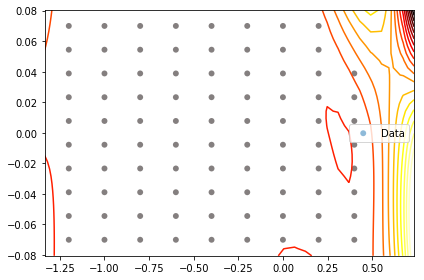

In [49]:
V.plot()

In [37]:
B = np.array([[0.05,0.0],[0.0,0.05]])
def q_estimate2(VGP,gp,s):
    def f(x):
        reward = bool(x[0] >= env.env.env.goal_position) * 100.0
        return [reward + V.predict(np.reshape(x,(-1,2)))[0][0][0]]
    for i in range(20):
        actions = np.random.uniform(-1,1, (50, 1))
        def UCB(gp):
            def f(a):
                val = opt.integrate(gp, env.env.env.preview_step(s,a)[0],B)
                return val[0] + 2.0*np.sqrt(val[1])
            return f
        acq_val = np.apply_along_axis(UCB(gp), 1, actions)
        index = acq_val.argmax()
        maxa = actions[index]
        _,_,z = opt.integrate(gp,env.env.env.preview_step(s,maxa)[0],B)
        xs = np.random.uniform(s - [0.2,0.2],s + [0.2,0.2], (50, 2))
        chosen = opt.bq_acquisition2(gp, env.env.env.preview_step(s,maxa)[0],B, xs,z,2)
        X = gp.X
        Y = gp.Y
        newX = chosen
        Xnew = np.vstack((X, newX))
        Yadd = newX.copy()
#         Yadd = np.apply_along_axis(f, 1, Yadd)
        Yadd = np.apply_along_axis(f, 1, Yadd)
        Ynew = np.vstack((Y, Yadd))
        gp = GPy.models.GPRegression(Xnew, Ynew, GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=1.0),noise_var=0.0)
    actions = np.random.uniform(-1,1, (100, 1))
    def VAL(gp):
        def f(a):
            val = opt.integrate(gp, env.env.env.preview_step(s,a)[0],B)
            return val[0]
        return f
    acq_val = np.apply_along_axis(VAL(gp), 1, actions)
    index = acq_val.argmax()
    maxa = actions[index]
    return maxa[0], acq_val[index]

In [36]:
done = False
for i in range(30):
    env.reset()
    while True:
        s = env.env.env.state
        actions = np.reshape(np.linspace(-1,1,100),(-1,1))
        def VAL(u):
            val = env.env.env.preview_step(s,u)
            return val[1] + 0.9 * VS[15].predict(np.array([val[0]]))[0]
        vals = np.apply_along_axis(VAL, 1, actions)
        maxa = actions[vals.argmax()]
        ob, reward, done, _ = env.step(maxa)
        if done:
                break
        

INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Starting ffmpeg with "ffmpeg -nostats -loglevel error -y -r 30 -f rawvideo -s:v 600x400 -pix_fmt rgb24 -i - -vcodec libx264 -pix_fmt yuv420p /tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4"
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video

DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4


DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4


DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4


DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.9604.video000000.mp4


KeyboardInterrupt: 

In [34]:
env.step(np.array([1.0]))

DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.1.2734.video000000.mp4


(array([-0.41407169,  0.01442191]), -0.1, False, {})

[[3.31578947 3.31578947]] 3.377868424194039 46.40494840522297
[[2.21052632 2.21052632]] 0.7875859020141542 14.664532989207942
[[2.21052632 3.31578947]] 0.33253626973930955 16.1963900088449
[[3.31578947 2.21052632]] 4.44548486914656 29.9562746421434
[[3.31578947 3.31578947]] 4.830526865686813 16.379028615308926
[[3.31578947 4.42105263]] 4.760519229952221 17.128107273520982
[[4.42105263 3.31578947]] 3.097837881255673 17.124726967143744
[[1.10526316 2.21052632]] 0.1750190893364787 11.572989920389773
[[1.10526316 3.31578947]] 5.968150946373924 11.206855365767069
[[2.21052632 1.10526316]] 0.9626049913506329 13.43260820675232
[[2.21052632 2.21052632]] 0.31503436080566166 15.370289472896758
[[2.21052632 3.31578947]] 3.4653779688622786 17.37904251134023
[[2.21052632 4.42105263]] 5.390587951563544 12.43013844744599
[[3.31578947 1.10526316]] 1.6626813486965477 14.658983848374646
[[3.31578947 2.21052632]] 5.460595587298136 19.542765608355694
[[3.31578947 3.31578947]] 4.585500140615742 16.59991662

[[6.63157895 4.42105263]] 3.902925692203475 7.994639734723933
[[7.73684211 2.21052632]] 2.852811156184603 6.957215653576511
[[7.73684211 3.31578947]] 3.255355061658504 7.198462877567636
[[0. 0.]] 1.627677530829252 44.61593753588386
[[0.         1.10526316]] 3.010328336587434 32.79045811435208
[[0.         2.21052632]] 4.620503958483038 44.90051725416561
[[0.         3.31578947]] 4.725515412084925 22.45279204729013
[[0.         4.42105263]] 5.793131857037445 10.684663827065378
[[0.         5.52631579]] 5.250572680094361 9.993139948725002
[[0.         6.63157895]] 5.198066953293417 8.390654649934731
[[1.10526316 0.        ]] 2.345255797108815 35.60311553331849
[[1.10526316 1.10526316]] 3.132841699122969 43.589485196727736
[[1.10526316 2.21052632]] 3.8854237832698275 36.39990755271083
[[1.10526316 3.31578947]] 0.4375477233411968 11.98854357221262
[[1.10526316 4.42105263]] 5.705622312369206 11.969170172749727
[[1.10526316 5.52631579]] 4.830526865686813 11.271409070874824
[[1.10526316 6.631

[[8.84210526 3.31578947]] 3.2028493348575604 5.945289036194481
[[8.84210526 4.42105263]] 3.7104046939333486 5.426773860686808
[[9.94736842 2.21052632]] 2.852811156184603 4.726518689006298
[[9.94736842 3.31578947]] 3.2028493348575604 4.882299643999886
[[0. 0.]] 0.8400916288150978 27.737868779948258
[[0.         1.10526316]] 0.28003054293836593 29.512418284830346
[[0.         2.21052632]] 5.898143310639332 28.590258389129303
[[0.         3.31578947]] 5.285576497961657 25.827813176652853
[[0.         4.42105263]] 4.953040228222347 22.033665485989786
[[0.         5.52631579]] 5.215568862227066 12.294781299609895
[[0.         6.63157895]] 2.8178073383173072 8.258857432868353
[[0.         7.73684211]] 5.443093678364487 6.093613426973661
[[0.         8.84210526]] 4.988044046089644 4.7375070258567575
[[1.10526316 0.        ]] 1.8552023469666743 28.226911429839674
[[1.10526316 1.10526316]] 2.012719527369505 27.76313546716483
[[1.10526316 2.21052632]] 4.44548486914656 28.897387091803466
[[1.1052

[[3.31578947 8.84210526]] 4.5504963227484465 5.974729348434266
[[3.31578947 9.94736842]] 4.567998231682094 4.786821679120976
[[ 3.31578947 11.05263158]] 4.673009685283981 3.9684689306807286
[[ 3.31578947 12.15789474]] 4.813024956753164 3.5102609701317533
[[4.42105263 0.        ]] 2.677792066848124 15.382852962193283
[[4.42105263 1.10526316]] 3.0803359723220254 17.488681820680114
[[4.42105263 2.21052632]] 2.5377767953789414 20.391529609872578
[[4.42105263 3.31578947]] 3.1853474259239123 22.105352021980252
[[4.42105263 4.42105263]] 3.8679218743361794 19.67202551310038
[[4.42105263 5.52631579]] 4.077944781539954 12.833123109070584
[[4.42105263 6.63157895]] 4.44548486914656 9.750266837072559


KeyboardInterrupt: 

In [20]:
VGP = GPS[-1]
path = []
x,y = 17.0,17.0
reachedGoal = False
for _ in range(50):
    print x,y
    path.append((x,y))
    s = np.array([[x,y]])
    gp = GPy.models.GPRegression(s, VGP.predict(s)[0], GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=1.0),noise_var=0.0)
    maxa, _ = q_estimate2(VGP,gp,s[0,:])
    (nx, ny),_ = p.transition(x,y,maxa)
    if not reachedGoal and p.in_goal(nx,ny):
        print "REACHED IN %d" % (i)
        reachedGoal=True
    x,y = nx,ny


17.0 17.0
15.92404458233766 16.44731079945481
15.080095119740076 15.965794371202916
14.179267317989991 15.709675198338315
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0
13.9429040944 15.0


KeyboardInterrupt: 

In [68]:
print VGP.predict(np.array([[20.0,20.0]]))

(array([[0.78783389]]), array([[1.14793316]]))


(array([[283.34022114]]), array([[1.35386346]]))
(array([[-3.98383032]]), array([[1.14793316]]))


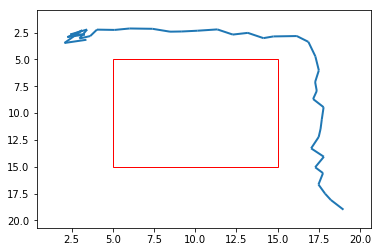

In [8]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.patches as patches
lines = []
for i in xrange(len(path)-1):
    lines.append([path[i],path[i+1]])

obstacles = []
for obs in p.obstacles:
    rec = patches.Rectangle((obs.bounds[0],obs.bounds[1]),obs.bounds[2]-obs.bounds[0],obs.bounds[3]-obs.bounds[1],linewidth=1,edgecolor='r',facecolor='none')
    obstacles.append(rec)


lc = mc.LineCollection(lines,linewidths=2)
fig, ax = pl.subplots()
# pl.plot([i[0] for i in path], [i[1] for i in path], 'ro')
for rec in obstacles:
    ax.add_patch(rec)

ax.add_collection(lc)
ax.autoscale()
ax.invert_yaxis()
ax.margins(0.1)